## Marriage - What is it Good For? 

## Questions

### Comparing Demographics 
1. What are the disparities in marriage rates across...
a - Education levels? 
b - Wealth levels? 
c - Race? 
2. How have these changed over time? 

### Historical Trends 
1. It's obvious that marriage rates have declined over time. But across which groups has the biggest hit been seen? 
It looks like a lot of the decline has been among 25-34 year olds. 

### Interesting Observations 
1. There's been a precipitious decline in marriage rates among young black people. 

In [24]:
import pandas as pd
import numpy as np
import math
% matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import scipy.stats  as stats

#https://github.com/fivethirtyeight/data/tree/master/marriage has a guide for keys


'''Keys guide for the dataframes.
HS = High school or less
SC = Some college
BAo = Bachelor's only
BAp = Bachelor's plus 
GD = Graduate degree 
White = White
Black = Black
Hisp = Hispanic
NE = Northeast
MA = Mid-Atlantic
Midwest, South, Mountain, Pacific
work = Employed 50+ weeks year prior 
nowork = NOT(work)
poor, mid, rich = [0-25], [25-75], [75-100] percentiles of family income.'''

'''Data on divorce measured at every decade from 1960-2000, then every year from 2001-2012.'''
divorce_df = pd.read_csv('data/divorce.csv', index_col=1).drop(['Unnamed: 0', 'date'], 1)
pd.to_numeric(divorce_df.index.values)

'''Figures in each cell are the share of that population that has never been married.'''
men_df = pd.read_csv('data/men.csv', index_col=1).drop(['Unnamed: 0', 'date'], 1)

'''Figures in each cell are the share of that population that has never been married.'''
women_df = pd.read_csv('data/women.csv', index_col=1).drop(['Unnamed: 0', 'date'], 1)

'''Figures in each cell are the share of that population that has never been married.'''
both_sexes_df = pd.read_csv('data/both_sexes.csv', index_col=1).drop(['Unnamed: 0', 'date'], 1)

'''To save us multiple calls. Each dataset was measured in the exact same set of years. This array
of year values will be the x-axis argument for many plots.'''
years_tracked = both_sexes_df.index.values

'''
Plots marriage rates across time. 
DF is the dataframe we're pulling data from over time 
KEYS are the key values we're plotting. Each corresponds to a line on the plot.
LABELS are the labels for each key in the legend. Must be the same size as KEYS.
FLIP VALUES is a boolean which is true iff we want to plot 1-df[key] instead of df[key]
TITLE 
'''
def plot_marriagerate_over_time(df, keys, labels, title, flip_values): 
    fig = plt.figure(figsize=[18, 12])
    ax = plt.subplot()
    for i in range(len(keys)): #will this compile? 
        if (flip_values): 
            ax.plot(years_tracked, 1 - df[keys[i]], label=labels[i])
        else:
            ax.plot(years_tracked, df[keys[i]], label=labels[i])
    ax.set_title(title, fontsize=60)
    ax.set_ylim(0, 1)
    ax.set_xlabel('Year', fontsize=40)
    ax.set_ylabel('Marriage Rate', fontsize=40)
    ax.tick_params(labelsize=30)
    ax.legend(fontsize=30)
    fig.show()
    
'''Assumes we\'re plotting the exact same values for both men and women
'''
def plot_marriagerate_menwomen(keys, labels, title, flip_values): 
    fig = plt.figure(figsize=[18, 12])
    ax = plt.subplot()
    for i in range(len(keys)): #will this compile? 
        if (flip_values): 
            ax.plot(years_tracked, 1 - men_df[keys[i]], label='Men ' + labels[i])
            ax.plot(years_tracked, 1 - women_df[keys[i]], label='Women ' + labels[i])
        else:
            ax.plot(years_tracked, men_df[keys[i]], label='Men ' + labels[i])
            ax.plot(years_tracked, women_df[keys[i]], label='Women ' + labels[i])
    ax.set_title(title, fontsize=60)
    ax.set_ylim(0, 1)
    ax.set_xlabel('Year', fontsize=40)
    ax.set_ylabel('Marriage Rate', fontsize=40)
    ax.tick_params(labelsize=30)
    ax.legend(fontsize=30)
    fig.show()

### Marriage Rates Over Time

While marriage rates have declined overall, 25-34 year olds account for an outsize share of this decline. They're marrying later in life.

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


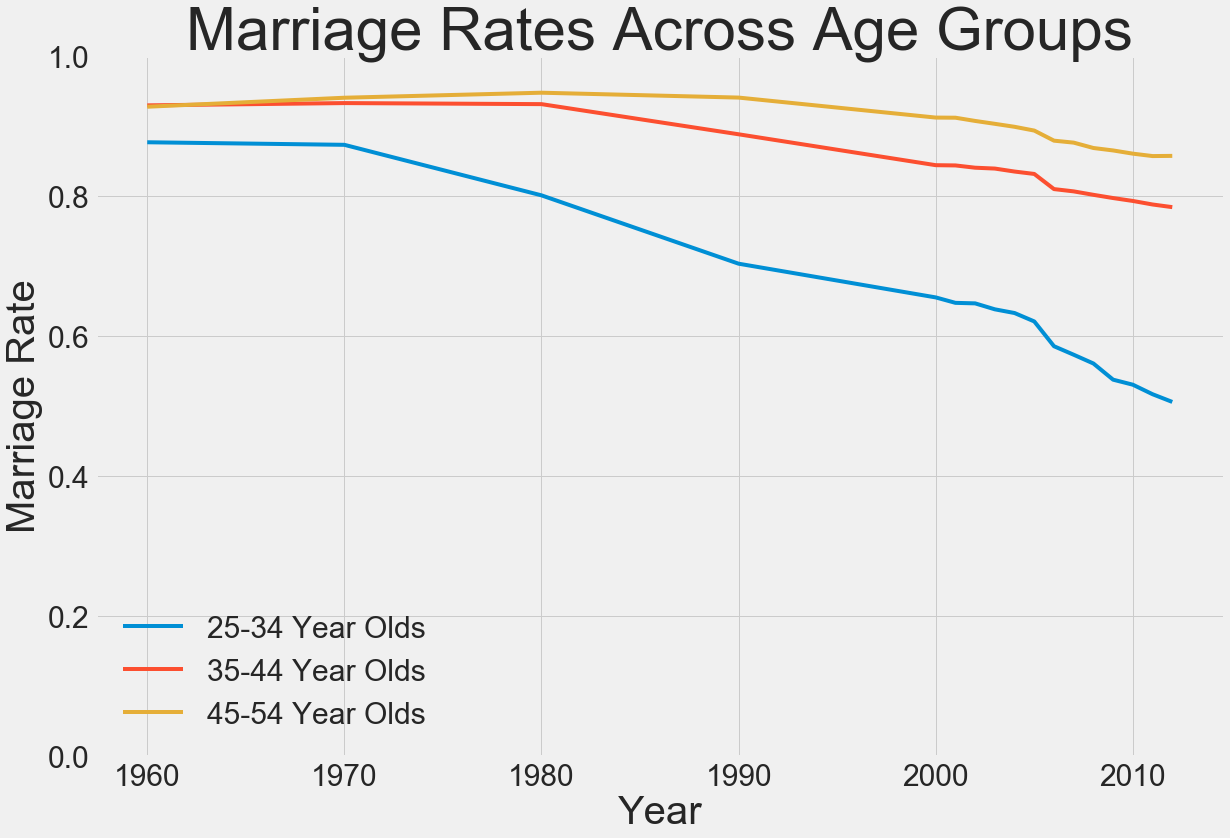

In [18]:
plot_marriagerate_over_time(
    both_sexes_df, ['all_2534', 'all_3544', 'all_4554'], 
    ['25-34 Year Olds', '35-44 Year Olds', '45-54 Year Olds'], 'Marriage Rates Across Age Groups', True)

### Marriage Rates Over Time and Race

Interestingly, white and hispanic rates closely track one another while blacks' marriage rates decline really harshly.

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


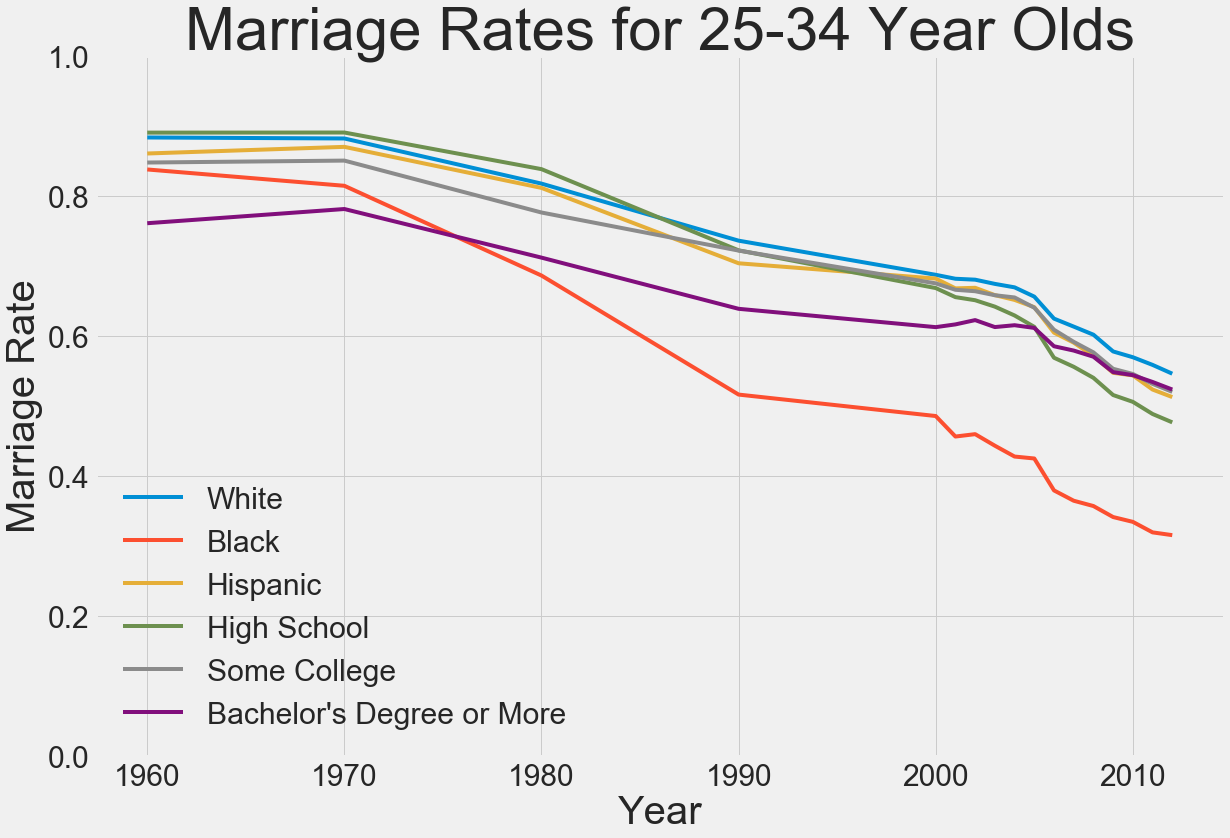

In [19]:
plot_marriagerate_over_time(
    both_sexes_df, ['White_2534', 'Black_2534', 'Hisp_2534', 'HS_2534', 'SC_2534', 'BAp_2534'], 
    ['White', 'Black', 'Hispanic', 'High School', 'Some College', 'Bachelor\'s Degree or More'], 
     'Marriage Rates for 25-34 Year Olds', True)

### Marriage Rates Across Education

Seems like there are some differences when people are young. But perhaps when older that's no longer the case.

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


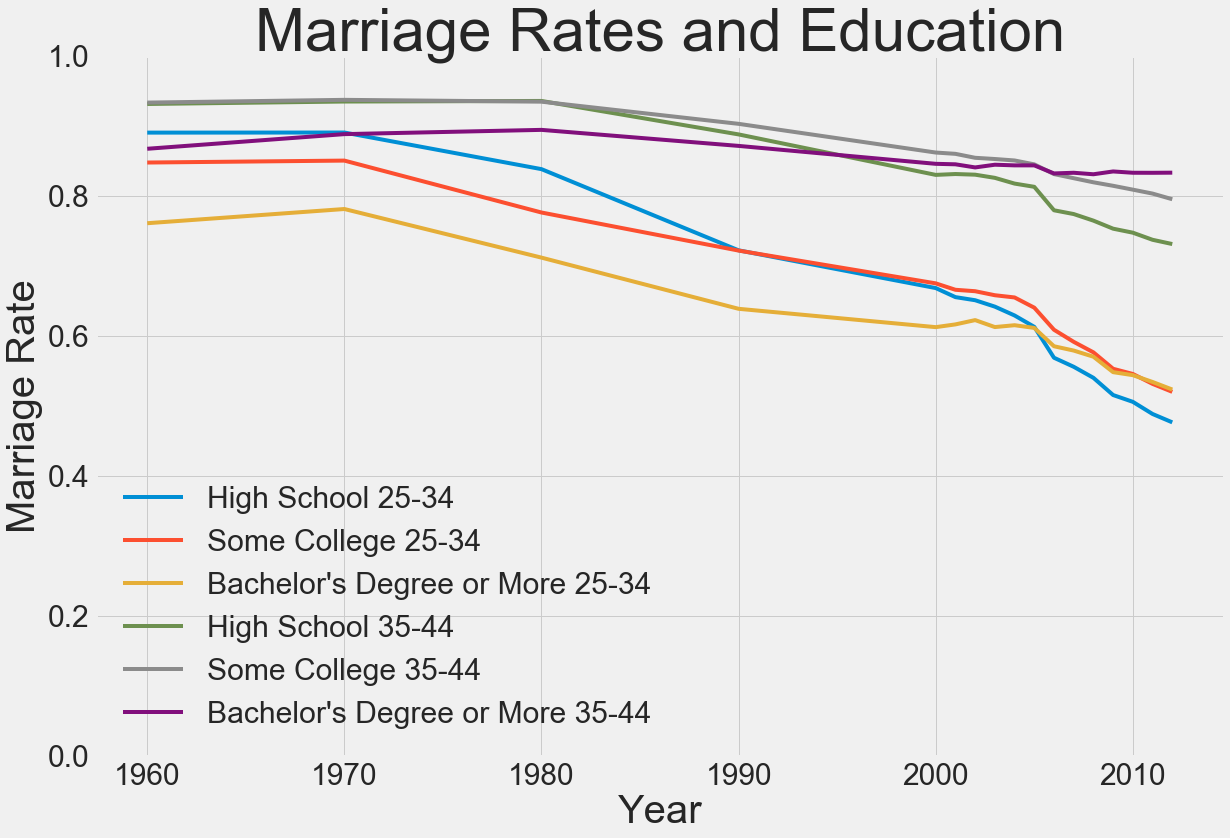

In [21]:
plot_marriagerate_over_time(
    both_sexes_df, ['HS_2534', 'SC_2534', 'BAp_2534', 'HS_3544', 'SC_3544', 'BAp_3544'], 
    ['High School 25-34', 'Some College 25-34', 'Bachelor\'s Degree or More 25-34',
    'High School 35-44', 'Some College 35-44', 'Bachelor\'s Degree or More 35-44'], 
     'Marriage Rates and Education', True)

### Employment vs Marriage? 

Interestingly, women who don't work are *most likely* to be married, while men who don't work are *least likely* to be married.

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


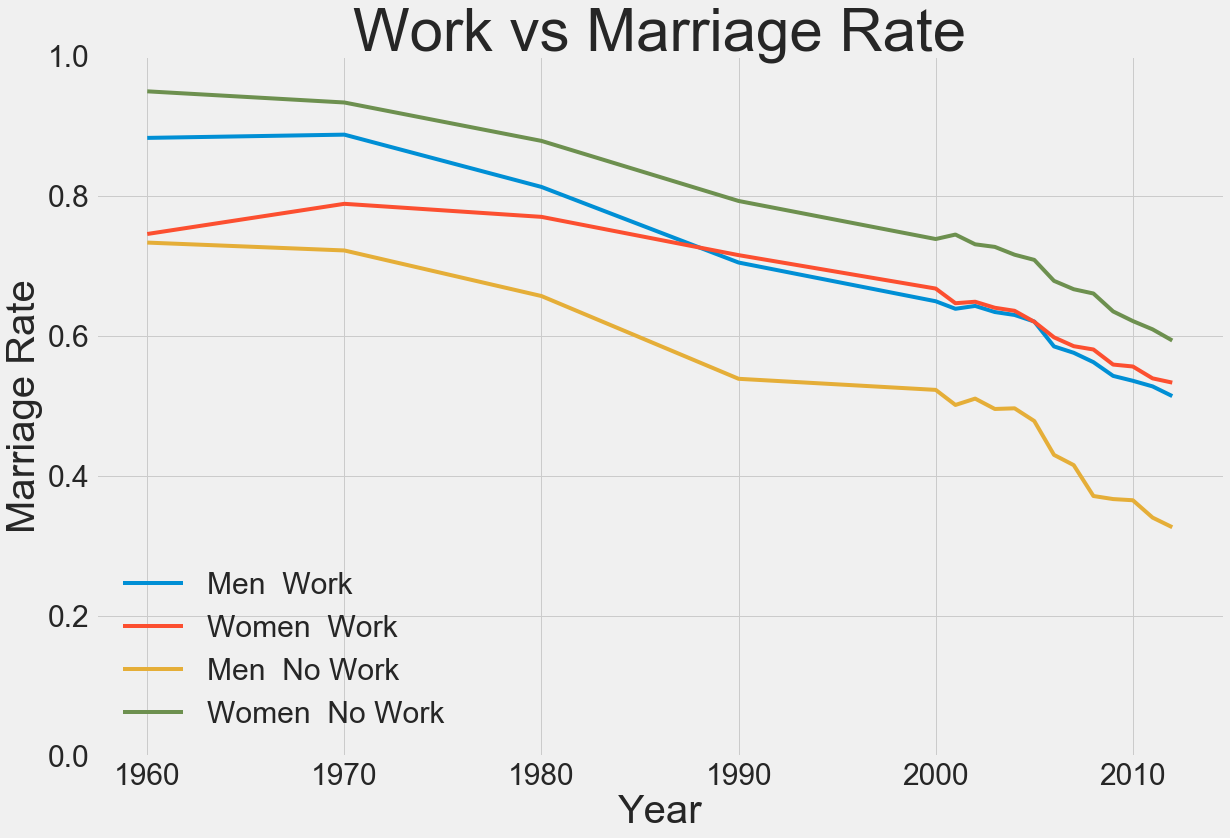

In [26]:
#work_2534, nowork_2534

plot_marriagerate_menwomen(['work_2534', 'nowork_2534'], [' Work', ' No Work'], 'Work vs Marriage Rate', True)

### Divorce Rates over Time 

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


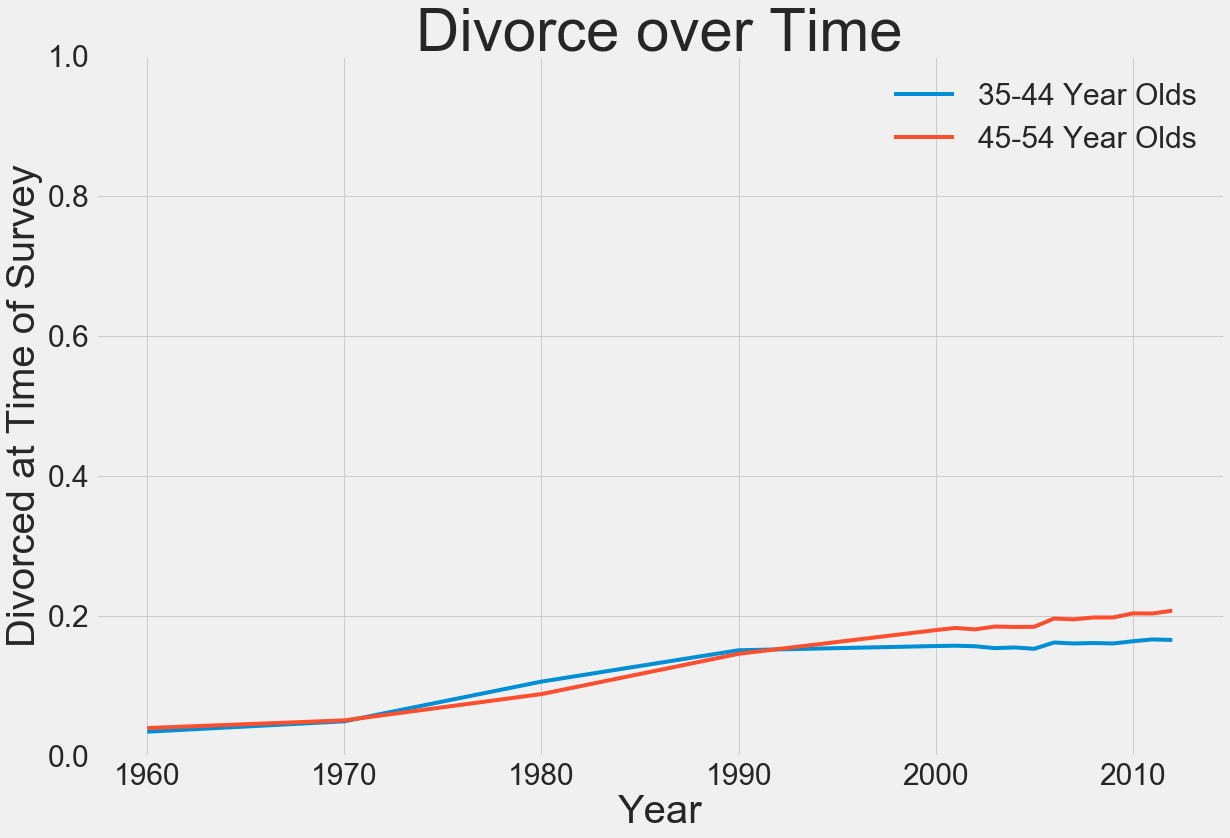

In [29]:
def plot_divorce_over_time(keys, labels, title, flip_values): 
    fig = plt.figure(figsize=[18, 12])
    ax = plt.subplot()
    for i in range(len(keys)): #will this compile? 
        if (flip_values): 
            ax.plot(years_tracked, 1 - divorce_df[keys[i]], label=labels[i])
        else:
            ax.plot(years_tracked, divorce_df[keys[i]], label=labels[i])
    ax.set_title(title, fontsize=60)
    ax.set_ylim(0, 1)
    ax.set_xlabel('Year', fontsize=40)
    ax.set_ylabel('Divorced at Time of Survey', fontsize=40)
    ax.tick_params(labelsize=30)
    ax.legend(fontsize=30)
    fig.show()
    
plot_divorce_over_time(['all_3544', 'all_4554'], ['35-44 Year Olds', '45-54 Year Olds'], 'Divorce over Time', False)

## Footnotes 

All data courtesy of FiveThirtyEight.